In [3]:
import json

In [5]:
with open("../data/loss_log.json", "r") as f:
    json_data = json.load(f)


In [6]:
json_data

{'proposed': [{'Epoch': 1,
   'loss': 0.3238011354911648,
   'test_loss': {'train-size=10': 0.27777547785576356,
    'train-size=20': 0.27974396896489123,
    'train-size=30': 0.276082159832437,
    'train-size=40': 0.2753493774761545,
    'train-size=50': 0.2808990151958263}},
  {'Epoch': 2,
   'loss': 0.2333262215757418,
   'test_loss': {'train-size=10': 0.2462866280941253,
    'train-size=20': 0.2440547524614537,
    'train-size=30': 0.2364516150444112,
    'train-size=40': 0.23322004793172188,
    'train-size=50': 0.23644216786673727}},
  {'Epoch': 3,
   'loss': 0.1920944363092369,
   'test_loss': {'train-size=10': 0.20723262556055758,
    'train-size=20': 0.19679743003972033,
    'train-size=30': 0.18605093879902618,
    'train-size=40': 0.18136618413189623,
    'train-size=50': 0.18096769188946865}},
  {'Epoch': 4,
   'loss': 0.15490680317581074,
   'test_loss': {'train-size=10': 0.1741092825665119,
    'train-size=20': 0.16038201781029396,
    'train-size=30': 0.1482567675411701

In [26]:
# models = ["proposed", "doc2vec"]
models = ["doc2vec"]
train_loss_names = {"loss": "train_loss"}
test_loss_names = {
    "train-size=10": "test-loss (train-size=10)",
    "train-size=20": "test-loss (train-size=20)",
    "train-size=30": "test-loss (train-size=30)",
    "train-size=40": "test-loss (train-size=40)",
    "train-size=50": "test-loss (train-size=50)",
}

loss_data = {}

for model in models:
    loss_data[model] = {}
    for epoch_data in json_data[model]:
        for loss_name, display_loss_name in train_loss_names.items():
            display_loss_name = model + " " + display_loss_name
            if display_loss_name not in loss_data[model]:
                loss_data[model][display_loss_name] = []
            loss_data[model][display_loss_name].append(epoch_data[loss_name])
        for loss_name, display_loss_name in test_loss_names.items():
            display_loss_name = model + " " + display_loss_name
            if display_loss_name not in loss_data[model]:
                loss_data[model][display_loss_name] = []
            loss_data[model][display_loss_name].append(epoch_data["test_loss"][loss_name])

/var/folders/3n/z49mbd414cx0_x991z2fyqjc0000gn/T/ipykernel_8761/3900119525.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


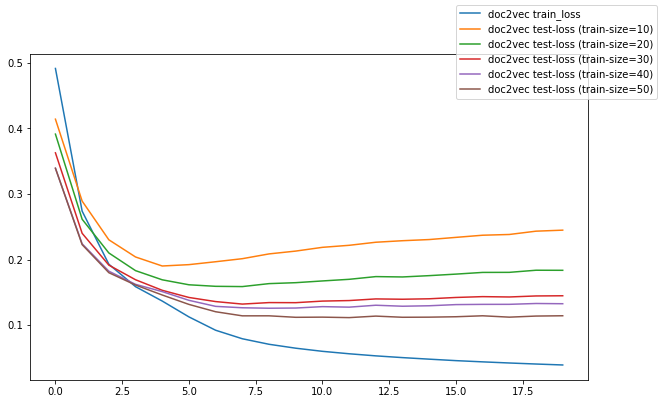

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

for model in models:
    for loss_name, losses in loss_data[model].items():
        ax.plot(losses, label=loss_name)

fig.legend()
fig.show()